<a href="https://colab.research.google.com/github/Sriharshitha842/DWDM_LAB/blob/main/LAB12_19bcd7246.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME OF THE STUDENT : SRIHARSHITHA D**
## **REG NO : 19BCD7246**
## **COURSE CODE : CSE4005**
## **SLOT : L31+L32+L15+L16+L23+L24**
## **LAB NO : 12**


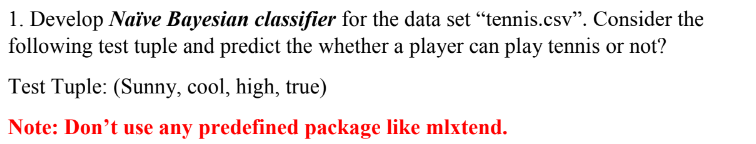

In [2]:
import pandas as pd
class_value={}
coloumn={}
data=[]
sample_data={}
result={}
global diff_values
diff_values=['empty']

def return_different_class_value(value):
    found=0
    for x in class_value:
        if(x==value):
            found=1
    if(found==0):
        class_value[value]=1
    else:
        class_value[value]+=1
        
def find_diff_value(values):
    already=0
    for index in diff_values:
        if(index==values):
            already=1
    if(already==0):
        diff_values.append(values)
        
def get_sample_data(prediction_value):
    for key in coloumn:
        attribute_no=1
        if(key!=prediction_value):
            for i in range(0,end):
                find_diff_value(data[i][coloumn[key]])
            del diff_values[0]
            for fields in diff_values:
                print('%d. %s'%(attribute_no,fields))
                attribute_no+=1
            what_data=int(input(' Select the sample data, for coloumn `` %s ``,(Enter no) : '%(coloumn[key])))
            sample_data[coloumn[key]]=diff_values[what_data-1]
            del diff_values[:]
            diff_values.append('empty')
            print("\n")
            
             
def choose_value():
    global to_find
    to_find=int(input(' Choose the coloumn to predict, (Only Enter, the number besides your choice):'))
    print(' \n >> Predicting Coloumn : %s  '%(coloumn[to_find]))
    global end
    end=len(data)
    for i in range(0,end):
        return_different_class_value(data[i][coloumn[to_find]])
    print("\n=============== INSERT SAMPLE DATA =================")
    get_sample_data(to_find)
    #del diff_value[0]

def get_index(value):
    for c in coloumn:
        if(value==coloumn[c]):
            return c
        
def find_probability(sample,classes):
    index=get_index(sample)
    k=0
    for i in range(0,end):
        if(sample_data[sample]==data[i][coloumn[index]] and classes==data[i][coloumn[to_find]]):
            k+=1
    return k

def find_max(d):
     v=list(d.values())
     k=list(d.keys())
     return k[v.index(max(v))]

def get_laplacian_estimation(flag):
    calculation=[]
    for values in prob_dict:
        for classes in class_value:
            if(flag==True):
                lap_value=prob_dict[values][classes]+1
                lap_div=class_value[classes]+1
            else:
                lap_value=prob_dict[values][classes]
                lap_div=class_value[classes]
            probability=(lap_value/lap_div)
            prob_dict[values][classes]=probability
    for classes in class_value:
        del calculation[:]
        total=0
        for values in prob_dict:
            calculation.append(prob_dict[values][classes])
        for i in range(0,len(calculation)):
            if(i==1):
                total=calculation[i]*calculation[i-1]
            if(i>1):
                total=calculation[i]*total
        if(flag==True):
            lap_total=end+1
            lap_class=class_value[classes]+1
        else:
            lap_total=end
            lap_class=class_value[classes]
        total=total*(lap_class/lap_total)
        result[classes]=total
    answer=find_max(result)
    return answer

def print_dict_as_table(dict):
    df = pd.DataFrame(dict).T
    df.fillna(0, inplace=True)
    print(df)

def main():
    import csv
    with open('/content/sample_data/tennis.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        sr_no=1
        for row in reader:
            #print('%s'%(row))
            data.append(row)
            sr_no+=1
    print('\n==============  SAMPLE DATA GIVEN =============\n')
    print(pd.DataFrame(data,index=list(range(1,len(data)+1))))
    print('\n==============  SELECT A COLOUMN TO PREDICT USING NAIVE BIAS  ============\n')
    no_2=1
    for key in data[0]:
        print('%d. %s'%(no_2,key))
        coloumn[no_2]=key
        no_2+=1
    choose_value()
    global prob_dict
    laplacian=False
    prob_dict={}
    for samples in sample_data:
        temp_dict={}
        for classes in class_value:
            prob=find_probability(samples,classes)
            temp_dict[classes]=prob
        prob_dict[samples]=temp_dict
    print('\n=========== SAMPLE DATA ===========\n')
    for s in sample_data:
        print(' >> %s :  %s'%(s,sample_data[s]))
    print("\n=========== DIFFERENT CLASS VALUES IN PREDICTION COLOUMN =============\n")
    for c in class_value:
        print(' >> %s :  %s'%(c,class_value[c]))
    print('\n=========== VALUES MATCHED FOR SAMPLE DATA ============\n')
    print_dict_as_table(prob_dict)
    for prob in prob_dict:
        for classes in class_value:
            if(prob_dict[prob][classes]== 0):
                laplacian=True
    print("\n===========  HYPOTHESIS FOR EACH SAMPLE DATA =============\n")
    if(laplacian==True):
        print(' Applying Laplacian Smoothing.(Laplacian Smoothing = True)\n')
        lap=True
        predicted_value=get_laplacian_estimation(lap)
    else:
        print(' Laplacian Smoothing not found.')
        lap=False
        predicted_value=get_laplacian_estimation(lap)
    print_dict_as_table(prob_dict)
    return predicted_value
    
if __name__=="__main__":
    answer=main()
    print('\n============ FINAL PROBABILITY FOR EACH PREDICTION ==============\n')
    for i in result:
        print(' >> %s  : %s '%(i,result[i]))
    print('\n Prediction using naive bias is, %s = %s'%(coloumn[to_find],answer))


==============  SAMPLE DATA GIVEN =============

     outlook  temp humidity  windy play
1      sunny   hot     high  false   no
2      sunny   hot     high   true   no
3   overcast   hot     high  false  yes
4      rainy  mild     high  false  yes
5      rainy  cool   normal  false  yes
6      rainy  cool   normal   true   no
7   overcast  cool   normal   true  yes
8      sunny  mild     high  false   no
9      sunny  cool   normal  false  yes
10     rainy  mild   normal  false  yes
11     sunny  mild   normal   true  yes
12  overcast  mild     high   true  yes
13  overcast   hot   normal  false  yes
14     rainy  mild     high   true   no

==============  SELECT A COLOUMN TO PREDICT USING NAIVE BIAS  ============

1. outlook
2. temp
3. humidity
4. windy
5. play
 Choose the coloumn to predict, (Only Enter, the number besides your choice):5
 
 >> Predicting Coloumn : play  

=============== INSERT SAMPLE DATA =================
1. sunny
2. overcast
3. rainy
 Select the sample data, for

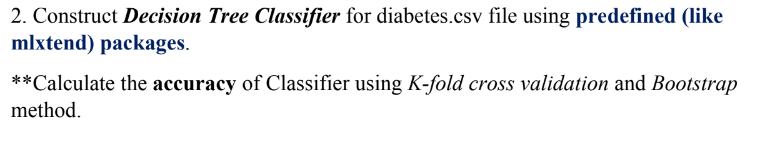

In [3]:
import pandas as pd
df=pd.read_csv("/content/sample_data/diabetes.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [27]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7662337662337663


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
print(scores)

[0.69480519 0.65584416 0.68181818 0.78431373 0.7124183 ]
